## Circuits with op-amp

Operational amplifies ("op-amp") are electronic devices to amplify an input voltage signal. They are widely used to construct filters that remve a desired range of frequencies from the input signal.

The schematic diagram of an op-amp is shown below. It has two terminals:

- input side (left)
- output terminal (right)

![opamp](opamp.png)

The output voltage is

$$
e_O = K(e_B - e_A)
$$

where $K$ is the voltage gain of the op-amp. $K$ is usually vey large (the order of $10^5 V / V$).

In the *ideal op-amp* scenario, the following assumptions hold:

- The input terminals of the op-amp draw negligible current.

- The voltage difference at the input terminals $e_B - e_A$ is zero.

- The gain $K$ is infinite.

## Example (inverting amplifier)

![opamp_circuit](opamp_circuit.png)

We can show that

$$
e_O = -\dfrac{KR_2}{R_1 + R_2 + KR_1}e_{in}(t)
$$

In the ideal op-amp, $K\to \infty$ and

$$
e_O = -\dfrac{R_2}{R_1}e_{in}(t)
$$

----

## Example (inverter with a capacitor)

![opamp_c](opamp_c.png)

We can shw that the output satisfied the following ODE

$$
\dfrac{de_o(t)}{dt} = -\dfrac{1}{R_2 C}e_o(t) - \dfrac{1}{R_1C}e_{in}(t)
$$

In [70]:
using ReachabilityAnalysis, Plots

In [73]:
function opamp_circuit(ein=Interval(1.4, 1.6))
    R₁ = 2
    R₂ = 4
    C = 1e-3
    α = hcat(-1/(R₂ * C))
    β = hcat(-1/(R₁ * C))
    return @system(x' = α * x + u, u ∈ β*ein, x ∈ Universe(1))
end

opamp_circuit (generic function with 2 methods)

In [74]:
S = opamp_circuit()
prob = @ivp(S, x(0) ∈ Interval(-0.01, 0.01))
sol = solve(prob, T=5e-2, alg=INT(δ=1e-4));

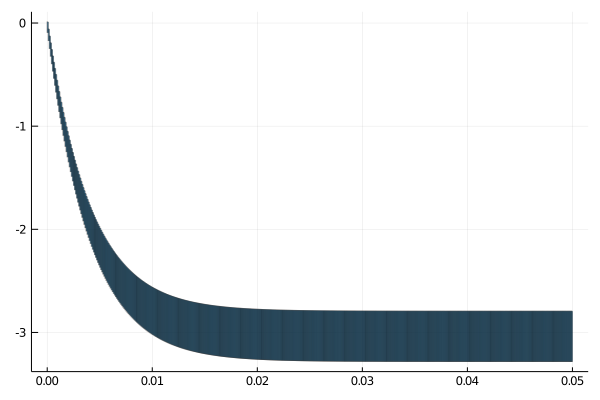

In [75]:
plot(sol, vars=(0, 1))

---

## Extensiones

- variacion en el valor de las resistencias y capacitor
- ruido en el opamp (ruido blanco + flicker a baja frecuencia)
- ganancia del operacional con un polo
- entrada $e_{in}(t)$ con una rampa
    - discretizar usar time-varying inputs
    - considerar $e_{in}(t)$ como una variable de estado con una dinamica eg. exponencial

- degradacion de resistencia
    - durante cuanto tiempo puedo asegurar que la salida sea de cierta forma (confiabilidad)

---